# Plus longue sous-séquence commune

[Vidéo d'accompagnement](https://vimeo.com/534066829)

## Notion de sous-séquence

Une *sous-séquence* s'obtient à partir d'une séquence en *supprimant certains de ses éléments*. 

*Exemple et contre-exemple*: Voici quelques sous-séquences pour la séquence ${\bf truc}$ 

$${\bf truc},\quad {\bf tru},\quad {\bf tuc},\quad{\bf ru}, \quad {\bf tc}, \quad {\bf ru},\quad {\bf u},\quad \epsilon$$

où $\epsilon$ «epsilon» représente la séquence vide.

${\bf ur}$ n'est pas une sous-séquence de ${\bf truc}$ car ses caractères ne sont pas dans le bon ordre. 

**Plus formellement**: $x=<x_1,x_2,\dots,x_p>$ est une *sous-séquence* d'une séquence $a$ de longueur $n$ si on peut trouver une suite *strictement croissante* d'entiers de longueur $p$, 

$$1\leqslant i_1<i_2<\dots <i_p\leqslant n$$ 

de telle façon que:$$x_1=a_{i_1},\qquad x_2=a_{i_2},\qquad \dots\qquad, x_p=a_{i_p}$$

*Note*: Cela n'est possible que si $p\leqslant n$. De plus, on considère que **la séquence vide** - notée $\epsilon$ - est aussi une sous-séquence de n'importe quelle autre.

*Exemple*: pour $x={\bf acmz}$ par rapport à $a={\bf abc\dots yz}$, on a (numérotation à partir de 1):

$$i_1=1,\qquad i_2=3,\qquad i_3=13\qquad \text{et}\qquad i_4=26\\ x_1=a_1={\bf a},\qquad x_2=a_3={\bf c},\qquad x_3=a_{13}={\bf m},\qquad \text{et}\qquad x_4=a_{26}={\bf z}$$

#### Exercice 1

1. Combien y a-t-il de sous-séquences pour une séquence de longueur 2 comme ${\bf ab}$? même question pour une séquence de longueur 3 comme ${\bf abc}$?

$\epsilon, {\bf a}, {\bf b}, {\bf ab}$ donc **4**

$\epsilon, {\bf a}, {\bf b}, {\bf c}, {\bf bc}, {\bf ac}, {\bf ab}, {\bf abc}$ donc **8**

2. Généraliser pour une séquence de longueur $n$. 

   *Aide*: Penser à une suite de bits de longueur $n$. un bit à 1 signifie prendre le caractère de même position...

Si on code par 1 «conserver un caractère de position donnée» et par 0 «supprimer un caractère de position donnée», choisir une sous-séquence d'une séquence de taille $n$ revient à choisir un mot binaire de taille $n$.

Or il y a $2^n$ tels mots donc aussi $2^n$ sous-séquences d'une séquence de taille $n$.

________

## Le problème

Le problème de **la plus longue sous-séquence commune** - PLSC - consiste à trouver, pour deux séquences $a$ et $b$ de tailles respectives $n$ et $m$ fournies en entrée, une sous-séquence $c$ *aussi bien de $a$ que de $b$* («commune» au deux) et qui soit **la plus longue possible**.

Essayer de résoudre un tel problème par «force brute» - c'est-à-dire en testant toutes les sous-séquences possibles - est une très mauvaise idée car, en supposant un instant que $n=m$, il y a $2^n$ sous-séquences possibles (voir exercice précédent) et l'algorithme serait de **complexité exponentielle**: pour $n=30$ (toute petite séquence), il y a déjà environ 1 milliard de cas à considérer (et pour $n=40$ ...). 

La programmation dynamique va permettre de résoudre ce problème avec une complexité de l'ordre de $n^2$ (quadratique). Par exemple, pour $n=30$ on ne fera que $30^2=900$ calculs (à comparer avec un milliard!).

#### Exercice 2

Pour $a={\bf programmer}$ et $b={\bf dormir}$, trouver trois sous-séquences commune à $a$ **et** $b$ de longueur $2$, $3$ et $4$.

${\bf or}, {\bf orm}, {\bf ormr}$ 

## Récurrence sur la longueur d'une PLSC

L'objectif de cette partie délicate est d'établir un lien entre la longueur d'une PLSC - plus longue sous-séquence commune - pour $a$ et $b$ et celle des PLSC de «portions» de $a$ et/ou de $b$ de façon à *réduire la taille du problème*.

**Cas 1**: si l'une des séquences est **vide** ($n=0$ ou $m=0$), la PLSC est clairement vide aussi donc sa longueur vaut **0**.

**Conventions de notation**: Par la suite, si $a$ désigne une séquence, $a'$ désigne celle obtenue à partir de $a$ *en supprimant son dernier élément*.

- *Exemple*: si $a={\bf progr}$ alors $a'={\bf prog}$.

De plus, si $a$ et $b$ désigne deux séquences, $ab$ désigne la séquence obtenue en **concaténant** $b$ à la suite de $a$.

- *Exemple*: si $a={\bf truc}$ et $b={\bf machin}$ alors $ab={\bf trucmachin}$ et $ba={\bf machintruc}$.

<hr width="50%"/>

**Cas 2**: Supposons qu'aucune des deux séquences d'entrées ne soit *vides*, on peut alors poser:

$$a=a'a_n\quad \text{et}\quad b=b'b_m$$ 

où $a_n$ et $b_m$ sont les derniers éléments de ces séquences (numérotation à partir de $1$).

On peut alors distinguer deux «sous-cas»:

1. les derniers caractères de $a$ et de $b$, $a_n$ et $b_m$, **coincident**: notons ${\bf x}$ leur valeur commune.

   Dans ce cas, si $c$ est une PLSC de $a$ et $b$ alors $c=c'{\bf x}$ et $c'$ est une PLSC de $a'$ et $b'$ 
   
   En effet, si on avait une PLSC de $a'$ et de $b'$ plus longue que $c'$, il suffirait de lui ajouter le *dernier élément* commun de $a$ et de $b$, à savoir ${\bf x}$, pour obtenir une PLSC de $a$ et $b$ **plus longue** que $c$. Mais, nous avons supposé que $c$ était la plus longue, c'est donc une **contradiction**! Donc $c'$ est une PLSC de $a'$ et $b'$.
   
   *Exemple* ou ${\bf x}$ est le caractère ${\bf c}$:   
   $$\begin{array}{l|l}
   a={\bf ab\underline{c}}&a'={\bf ab}\cr
   b={\bf az\underline{c}}&b'={\bf az}\cr
   c={\bf ac}&c'={\bf a}
   \end{array}
   $$
   

2. $a_n$ et $b_m$ **diffèrent**.

   Dans ce cas, si $c$ est un PLSC de $a$ et $b$ c'est *soit* une PLSC de $a'$ et $b$, *soit* une PLSC de $a$ et $b'$.
   
   En effet, le dernier élément de $c$ est différent de $a_n$ ou bien de $b_m$ (puisque ces deux là diffèrent). Si il est différent de $a_n$, $c$ est «assez clairement» une PLSC de $a'$ ($a$ privé de $a_n$) et de $b$. Dans l'autre cas, c'est une PLSC de $a$ et $b'$.
   
   *Exemple*: le dernier élément de $c$ est différent de $a_n={\bf c}$   
   $$\begin{array}{l|l}
   a={\bf bod\underline{c}}&a'={\bf bod}\cr
   b={\bf abt\underline{d}}&b={\bf abtd}\cr
   c={\bf bd}&c={\bf bd}
   \end{array}
   $$

Finalement, si on note $L(a,b)$ la longueur d'une PLSC de deux séquences $a$ et $b$ de longueurs respectives $n$ et $m$ alors on a la récurrence:

$$L(a,b)=\left\{\begin{array}{lr}
0&\text{si } n=0\text{ ou } m=0\cr
L(a',b')+1&\text{sinon si } a_n=b_m\cr
\max\{L(a',b),L(a,b')\}&\text{sinon }(a_n\neq b_m)
\end{array}\right.$$

Et cela permet de calculer cette longueur puisque les sous-problèmes à résoudre sont strictement plus petits que le problème d'origine.

*Conseil*: Noter soigneusement cette récurrence pour faciliter la suite.

#### Exercice 3

Écrire une fonction récursive `L_rec(a, b)` qui renvoie la longueur d'une PLSC des séquences `a` et `b`. On pourra les voir comme des chaîne de caractères.

Par exemple, `L_rec("programmer", "dormir")` renvoie (péniblement) 4.

*Aide-rappel*: si `a` est une liste de longueur $n$ alors ce qu'on note $a'$ correspond à `a[:n-1]`. Cela est aussi valable pour les chaînes de caractères.

In [ ]:
def L_rec(a, b):
    n, m = len(a), len(b)
    if n == 0 or m == 0:
        return 0
    if a[n-1] == b[m-1]:
        return 1 + L_rec(a[:n-1], b[:m-1])
    else:
        return max(L_rec(a[:n-1], b), L_rec(a, b[:m-1]))

L_rec("programmer", "dormir")
# L_rec("programmer en sifflotant", "dormir en ronflant") # risque d'être nettement plus long!

## Calcul de la longueur d'une PLSC par programmation dynamique

Pour comprendre comment transformer l'algorithme récursif de `L_rec` en un algorithme itératif par programmation dynamique, considérez attentivement le tableau partiellement rempli ci-dessous.

         |   d o r m i r | i
       --|---------------|--
         | 0 0 0 0 0 0 0 | 0
       p | 0 0 0 0 0 0 0 | 1
       r | 0 0 0 1 1 1 1 | 2
       o | 0 0 1 1 1 1 1 | 3
       g | 0 0 1 1 1 1 1 | 4
       r | 0 0 1 2 - - - | 5
       a | 0 - - - - - - | 6
       m | 0 - - - - - - | 7
       m | 0 - - - - - - | 8
       e | 0 - - - - - - | 9
       r | 0 - - - - - - |10
       --|---------------|--
       j : 0 1 2 3 4 5 6 |

Dans ce tableau, le nombre situé au croisement d'une lettre de $\bf programmer$ (en ligne) et d'une lettre de $\bf dormir$ (en colonne) correspond à la longueur d'une PLSC *des sous-chaînes «préfixes» qui vont jusqu'à la lettre lue incluse*.
   
Par exemple, le nombre $2$ du tableau correspond à $L({\bf prog\underline{r}}, {\bf do\underline{r}})$. On l'obtient avec la relation de récurrence où les derniers caractères *coincident*:
   
   $$L({\bf prog\underline{r}}, {\bf do\underline{r}})=L({\bf prog}, {\bf do})+1=1+1=2$$
   
Le nombre d'après (qui n'est pas écrit) sur la même ligne correspond à $L({\bf prog\underline{r}}, {\bf dor\underline{m}})$. Comme les derniers caractères *diffèrent*, la récurrence donne:
    
   $$\begin{eqnarray}L({\bf prog\underline{r}}, {\bf dor\underline{m}})&=&\max\{L({\bf pro\underline{g}}, {\bf dor\underline{m}}),L({\bf prog\underline{r}}, {\bf do\underline{r}})\}\cr&=&\max\{1, 2\}=2\end{eqnarray}$$
   

#### Exercice 4

Compléter ce tableau jusqu'au bout en utilisant la relation de récurrence. Vous pouvez le faire directement dans le notebook en passant en mode insertion (touche *inser*).

         |   d o r m i r | i
       --|---------------|--
         | 0 0 0 0 0 0 0 | 0
       p | 0 0 0 0 0 0 0 | 1
       r | 0 0 0 1 1 1 1 | 2
       o | 0 0 1 1 1 1 1 | 3
       g | 0 0 1 1 1 1 1 | 4
       r | 0 0 1 2 - - - | 5
       a | 0 - - - - - - | 6
       m | 0 - - - - - - | 7
       m | 0 - - - - - - | 8
       e | 0 - - - - - - | 9
       r | 0 - - - - - - |10
       --|---------------|--
       j : 0 1 2 3 4 5 6 |

         |   d o r m i r | i
       --|---------------|--
         | 0 0 0 0 0 0 0 | 0
       p | 0 0 0 0 0 0 0 | 1
       r | 0 0 0 1 1 1 1 | 2
       o | 0 0 1 1 1 1 1 | 3
       g | 0 0 1 1 1 1 1 | 4
       r | 0 0 1 2 2 2 2 | 5
       a | 0 0 1 2 2 2 2 | 6
       m | 0 0 1 2 3 3 3 | 7
       m | 0 0 1 2 3 3 3 | 8
       e | 0 0 1 2 3 3 3 | 9
       r | 0 0 1 2 3 3 4 |10
       --|---------------|--
       j : 0 1 2 3 4 5 6 |

Ainsi, pour mémoriser la longueur d'une PLSC pour les $i$ premiers caractères de $a$ et les $j$ premiers de $b$ - notez que $0\leqslant i\leqslant n$ et $0\leqslant j\leqslant m$ - on va utiliser une matrice (tableau) de taille $(n+1)\times (m+1)$ comme expliqué plus tôt.

Pour la construire, on peut utiliser l'écriture en compréhension vue en première:

```python
[[0] * (m+1) for _ in range(n+1)]
```

où `n, m = len(a), len(b)`. On choisit la valeur $0$ par défaut car elle correspond aux cas de base où l'une des chaîne est vide (première ligne, première colonne...).

Ensuite, en utilisant deux *boucles imbriquées* pour parcourir cette matrice ligne par ligne et de gauche à droite, on peut compléter les valeurs «manquantes» en utilisant la relation de récurrence comme vous l'avez fait à la main dans l'exercice précédent.

#### Exercice 5

1. Compléter la fonction `L_iter(a,b)` suivante qui calcule *itérativement* la longueur d'une PLSC de $a$ et $b$ à l'aide d'un tableau approprié et la renvoie.

   *Note*: vous pouvez utiliser la fonction `aff` donnée ci-après pour «afficher proprement» la matrice construite par l'algorithme afin de le comparer avec celui obtenu dans l'exercice 4.

2. Quelle est sa complexité en temps? en mémoire?

In [ ]:
def L_iter(a, b):
    n, m = len(a), len(b)
    # initialisation du tableau (ou matrice)
    tab = ...
    
    # remplissage ligne à ligne et de la gauche vers la droite
    for i in range(...):
        for j in range(...):
            ...
    
    aff(tab)
    # renvoie de la dernière case
    return ...

In [ ]:
def aff(mat):
    n = len(mat)
    m = len(mat[0])
    for i in range(n):
        for j in range(m):
            if j != m-1:
                print(mat[i][j], end=" ")
            else:
                print(mat[i][j])

In [ ]:
def L_iter(a, b):
    n, m = len(a), len(b)
    # initialisation du tableau dont la case i,j contient 
    # la longueur d'une PLSC de a[:i] et b[:j] 
    tab = [[0] * (m+1) for _ in range(n+1)]
    
    # on remplit le tableau ligne par ligne
    for i in range(1, n+1):
        for j in range(1, m+1):
            if a[i-1] == b[j-1]:
                tab[i][j] = 1 + tab[i-1][j-1]
            else:
                tab[i][j] = max(tab[i-1][j], tab[i][j-1])
    aff(tab)
    return tab[n][m]

# complexité en temps (boucles imbriqués) O(mn);
# complexité en mémoire O(mn) car c'est la place qu'il faut réserver pourle tableau.

L_iter("programmer", "dormir")

## Calcul d'une PLSC

Pour l'instant notre algorithme répond à la question «quelle est la longueur de la PLSC?». 

Mais nous souhaiterions aussi pouvoir **expliciter** *une* PLSC effective. Pour cela, on peut parcourir la matrice calculée par l'algorithme «à l'envers». Pour notre exemple, cette matrice est:

                            b

                    |   d o r m i r | i
                 ---|---------------|--
                    | 0 0 0 0 0 0 0 | 0
                  p | 0 0 0 0 0 0 0 | 1
                  r | 0 0 0 1 1 1 1 | 2
                  o | 0 0 1 1 1 1 1 | 3
                  g | 0 0 1 1 1 1 1 | 4
             a    r | 0 0 1 2 2 2 2 | 5
                  a | 0 0 1 2 2 2 2 | 6
                  m | 0 0 1 2 3 3 3 | 7
                  m | 0 0 1 2 3 3 3 | 8
                  e | 0 0 1 2 3 3 3 | 9
                  r | 0 0 1 2 3 3 4 | 10
                 ---|---------------|--
                  j | 0 1 2 3 4 5 6 |



On commence donc avec $i=10$ et $j=6$.
1. `m[10][6]=4` et $a_{10}=b_6={\bf r}$: ce nombre a donc été calculé en utilisant la case «nord-ouest» `m[9][5]`.

  On conserve donc ce $\bf r$ puis on recule *d'une ligne et d'une colonne* de façon à se placer sur cette case:

  $$i\leftarrow i-1,\quad j\leftarrow j-1$$

2. Ensuite `m[9][5]=3` et $a_{9}={\bf e}\neq {\bf i}=b_{5}$: ce nombre a donc été calculé en utilisant le «max» de `m[8][5]=3` et `m[9][4]=3`. Comme ils ont même valeur, on peut *choisir* de reculer d'une ligne ou bien de reculer d'une colonne (c'est indifférent). *Si on choisit la colonne alors* 

  $$j\leftarrow j-1$$.

3. on continue avec `m[9][4]=3` et $a_{9}={\bf e}\neq {\bf m}=b_{4}$. Comme `m[9][3]` < **`m[8,4]`**, ici on **doit** reculer d'une ligne: 

  $$i\leftarrow i-1$$

4. on se retrouve avec `m[8,4]=3` et $a_{8}=b_4={\bf m}$
donc on conserve cette lettre et on recule d'une ligne et d'une colonne: 

  $$i\leftarrow i-1,\quad j\leftarrow j-1$$

5. on poursuit comme cela **tant que** $i$ et $j$ sont strictement positifs c'est-à-dire tant qu'on peut reculer soit en ligne soit en colonne. 
   
   

Voici à nouveau ces étapes pas à pas sur le même tableau «tronqué»:

<p style="text-align:center;">
    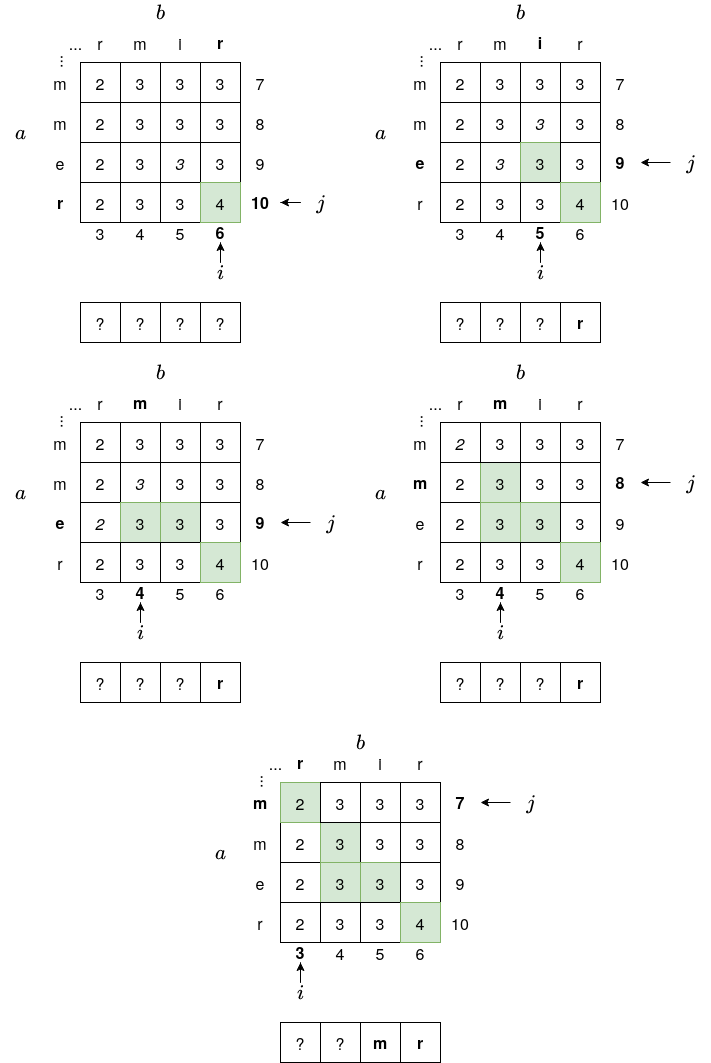
</p>

**Récapitulatif**: Lors d'une itération $i,j$ de la boucle **tant que**, si $a_i=b_j={\bf x}$:
-  **alors** `m[i,j]` à été calculé à partir de `m[i-1, j-1]` et le caractère ${\bf x}$ fait partie de la PLSC. On mémorise donc ce «caractère» et on recule d'une ligne **et** d'une colonne soit la nouvelle position `i = i-1, j = j-1`.

- **sinon**, `m[i, j]` a été calculé à partir de `m[i-1, j]` ou `m[i, j-1]` donc on recule d'une ligne **ou** d'une colonne selon que `m[i-1, j] > m[i, j-1]` ou non. En cas d'égalité, les deux déplacements conviennent...

Enfin, observez que cet algorithme récupère une PLSC «à l'envers», il faudra donc penser à la remettre à l'endroit!

#### Exercice 6

En utilisant les explications données ci-avant, adapter l'algorithme itératif précédent en une fonction `PLSC(a, b)` qui renvoie la longueur maximale d'une PLSC de `a` et `b` ainsi que cette PLSC.

In [ ]:
def PLSC(a, b):
    n, m = len(a), len(b)
    # initialisation du tableau dont la case i,j contient 
    # la longueur d'une PLSC de a[:i] et b[:j] 
    tab = [[0] * (m+1) for _ in range(n+1)]
    
    # on remplit le tableau ligne par ligne
    for i in range(1, n+1):
        for j in range(1, m+1):
            if a[i-1] == b[j-1]:
                tab[i][j] = 1 + tab[i-1][j-1]
            else:
                tab[i][j] = max(tab[i-1][j], tab[i][j-1])
    
    # Calcul d'une PLSC
    i, j = n, m
    pile = []
    while i > 0 and j > 0:
        if a[i-1] == b[j-1]: # a[i-1] du fait que les indices démarrent à 0
            pile.append(a[i-1])
            i -= 1
            j -= 1
        elif tab[i][j] == tab[i-1][j]:
            i -= 1
        else:
            j -= 1
    # on remet la PLC à l'endroit
    ch = ""
    while len(pile) > 0:
        ch += pile.pop()
    return tab[n][m], ch

PLSC("programmer", "dormir")